In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from src.data import io
from src.visualization import visualize

In [4]:
species = "Tomato"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Tomato - train_dir: ../data/processed/Tomato - metadata_file_path: ../data/processed/Tomato/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: 9d01c36a-5654-4858-8343-e9b923b9bfc5


In [6]:
model_metadata_file_path = model_dir.joinpath(model_id, "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [10]:
model_metadata

{'id': '9d01c36a-5654-4858-8343-e9b923b9bfc5',
 'created_date': '2020-01-26 10:19:13',
 'arguments': {'batch_size': 64, 'epochs': 100, 'monitor': 'val_loss'},
 'dataset': {'id': '9d01c36a-5654-4858-8343-e9b923b9bfc5',
  'species': 'Tomato',
  'num_classes': 10,
  'class_names': ['Tomato___Bacterial_spot',
   'Tomato___Early_blight',
   'Tomato___Late_blight',
   'Tomato___Leaf_Mold',
   'Tomato___Septoria_leaf_spot',
   'Tomato___Spider_mites Two-spotted_spider_mite',
   'Tomato___Target_Spot',
   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
   'Tomato___Tomato_mosaic_virus',
   'Tomato___healthy'],
  'created_date': '2020-01-26 05:24:42',
  'file_counts': {'train': 10803, 'test': 3601, 'eval': 3602}},
 'history': {'loss': [1.1055463543605237,
   0.4548476927337192,
   0.30778830054970013,
   0.2319823671575813,
   0.19380201411522216,
   0.15973686049914076,
   0.11010111911621477,
   0.0912462406558916,
   0.10234997501885075,
   0.0781448433297642,
   0.07180338634810011],
  'accuracy'

In [7]:
history = model_metadata["history"]

In [8]:
metrics_df = visualize.create_metrics_dataframe(history)

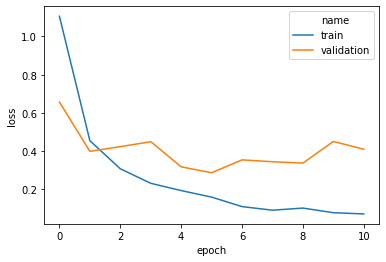

In [9]:
loss_plot = visualize.learning_curves("loss", metrics_df)

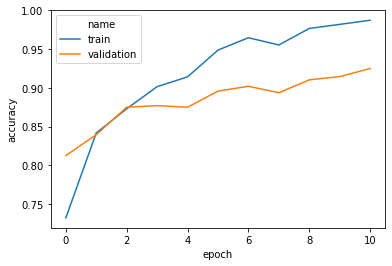

In [16]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)